In [101]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from torchsummary import summary

from collections import Counter
from data import load_data
from model import Model

### Load data

The dataset treated in this notebook is the German Traffic Sign Recognition Benchmmark. It presents a multi-class classification problem with 43 classes and more than 50000 images.

J. Stallkamp, M. Schlipsing, J. Salmen, C. Igel, Man vs. computer: Benchmarking machine learning algorithms for traffic sign recognition, Neural Networks, Available online 20 February 2012, ISSN 0893-6080, 10.1016/j.neunet.2012.02.016. (http://www.sciencedirect.com/science/article/pii/S0893608012000457) Keywords: Traffic sign recognition; Machine learning; Convolutional neural networks; Benchmarking

In [53]:
train_loader, val_loader, test_loader = load_data(batch_size=512)
y = [y for (x, y) in train_loader.dataset]
y_count = Counter(y)
y_count = {str(k): v for k, v in sorted(y_count.items(), key=lambda item: item[1], reverse=True)}

dataset_train 26640


### Class imbalance

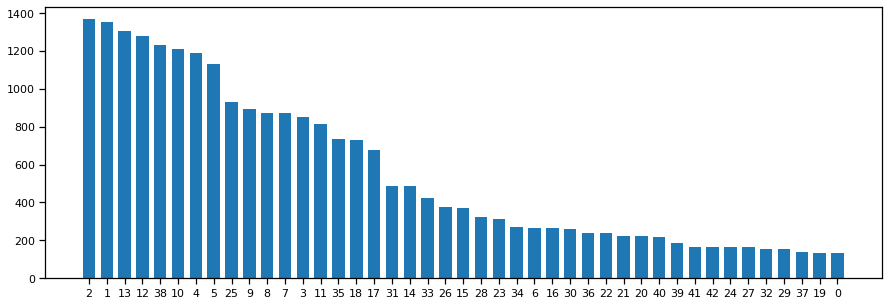

In [62]:
plt.figure(figsize=(15, 5))
plt.bar(x=list(y_count.keys()), height=list(y_count.values()), width=0.7)
plt.show()

What do the 5 most frequent and infrequent traffic signs look like?

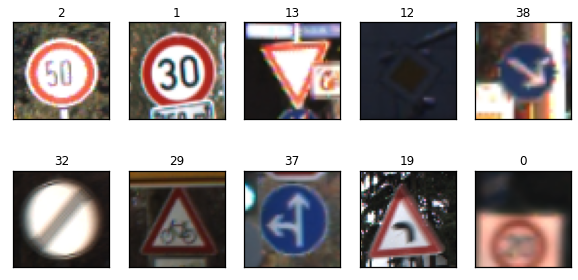

In [100]:
most_frequent = list(y_count.keys())[:5]
least_frequent = list(y_count.keys())[-5:]

idx, (x, y) = next(enumerate(train_loader))

plt.figure(figsize=(10, 5))
for idx, i in enumerate(most_frequent):
    plt.subplot(2, 5, idx+1)
    traffic_sign = x[y == int(i)][0]
    plt.imshow(traffic_sign.permute(1, 2, 0))
    plt.title(i)
    plt.xticks([])
    plt.yticks([])
for idx, i in enumerate(least_frequent):
    plt.subplot(2, 5, idx+6)
    traffic_sign = x[y == int(i)][0]
    plt.imshow(traffic_sign.permute(1, 2, 0))
    plt.title(i)
    plt.xticks([])
    plt.yticks([])
plt.show()

### The model

In [114]:
model = Model().cuda()
summary(model, (3, 50, 50))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 100, 46, 46]           7,600
              ReLU-2          [-1, 100, 46, 46]               0
         MaxPool2d-3          [-1, 100, 23, 23]               0
       BatchNorm2d-4          [-1, 100, 23, 23]             200
            Conv2d-5          [-1, 200, 20, 20]         320,200
              ReLU-6          [-1, 200, 20, 20]               0
         MaxPool2d-7          [-1, 200, 10, 10]               0
       BatchNorm2d-8          [-1, 200, 10, 10]             400
            Conv2d-9            [-1, 300, 8, 8]         540,300
             ReLU-10            [-1, 300, 8, 8]               0
      BatchNorm2d-11            [-1, 300, 8, 8]             600
          Flatten-12                [-1, 19200]               0
           Linear-13                 [-1, 1024]      19,661,824
             ReLU-14                 [-

In [109]:
next(enumerate(train_loader))[1][0].shape

torch.Size([512, 3, 50, 50])

### Training the model

### Inspecting missclassifications